In [101]:
import requests
import pandas as pd
import re
import numpy as np
import os

import math
import statistics

from bs4 import BeautifulSoup

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [102]:
df = pd.read_csv('sake_info.csv')

In [3]:
df.shape

(164, 26)

In [4]:
pd.set_option("display.max_columns", 100)
df.rice.value_counts()

Yamada Nishiki                                 55
Gohyaku Mangoku                                29
Miyama Nishiki                                 10
Omachi                                          3
na                                              3
Dewasansan                                      2
Gin Otome                                       2
Akita Sake Komachi                              2
Gin no Sei                                      2
Hitogokochi                                     2
Tama Zakae                                      2
Yamada Nishiki, Hattan Nishiki                  2
Fukushima Prefecture Rice                       2
Akitsuho                                        1
Akaiwa Omachimai                                1
Yumesansui                                      1
Yamada Nishiki & Miyama Nishiki                 1
Gohyaku Mangoku, Koshi Ibuki, Hokuriku #12      1
Prefecture Rice                                 1
Haenuki                                         1


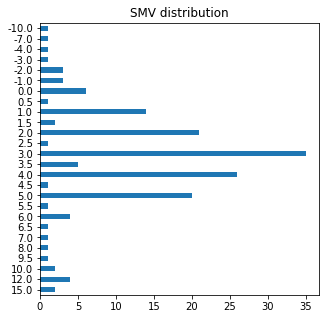

In [5]:
df.SMV_cleaned.value_counts().sort_index(ascending=False).plot(kind='barh', figsize=(5,5),
                                                              title='SMV distribution')

In [6]:
df.sake_type_cleaned.value_counts()

Junmai Ginjo               47
Junmai                     44
Junmai Daiginjo            29
Tokubetsu Junmai           21
Ginjo                       8
Daiginjo                    7
Honjozo                     3
Futsu-shu                   2
Junmai Ginjo  Genshu        1
Junmai Daiginjo  Genshu     1
Tokubetsu Honjozo           1
Name: sake_type_cleaned, dtype: int64

In [7]:
df.shape

(164, 26)

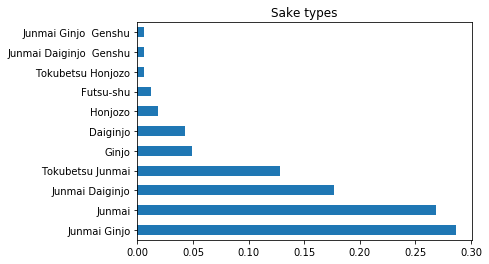

In [8]:
ax = (df.sake_type_cleaned.value_counts() / 164).sort_values(ascending=False).plot(kind='barh',
                                                                 title='Sake types')


plt.savefig("farview-saketype.pdf",  bbox_inches='tight')

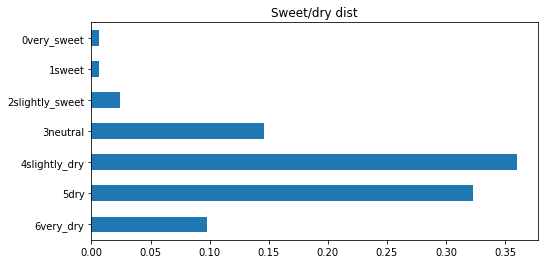

In [9]:
(df.SMV_dry_sweet.value_counts()/164).sort_index(ascending=False).plot(kind='barh',
                                                                 figsize=(8,4),
                                                                 title='Sweet/dry dist')

plt.savefig("farview-sweetness.pdf",  bbox_inches='tight')

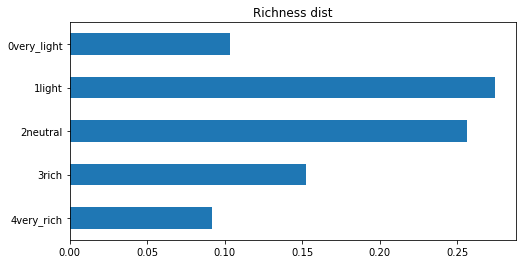

In [10]:
(df.acidity_richness.value_counts()/164).sort_index(ascending=False).plot(kind='barh',
                                                                 figsize=(8,4),
                                                                 title='Richness dist')

plt.savefig("farview-richness.pdf",  bbox_inches='tight')

In [11]:
count = df.acidity_richness.value_counts()
count = pd.DataFrame(count)
count = count.rename(columns={'acidity_richness':'values'})
count

,values
1light,45
2neutral,42
3rich,25
0very_light,17
4very_rich,15


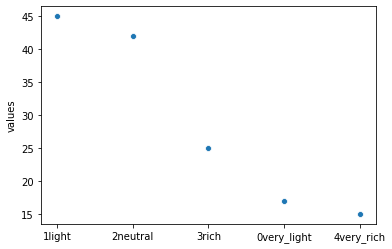

In [12]:
sns.scatterplot(data=count, x=count.index, y='values')

In [13]:
df.alcohol_cleaned.describe()

count    164.000000
mean      15.765854
std        0.842902
min       12.300000
25%       15.500000
50%       15.500000
75%       16.500000
max       19.500000
Name: alcohol_cleaned, dtype: float64

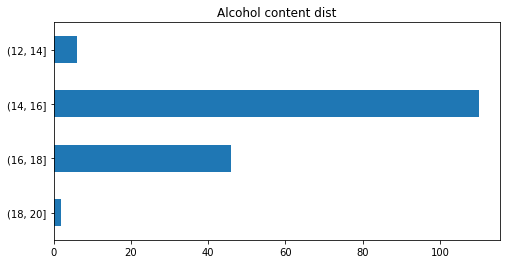

In [14]:
binned = pd.cut(df.alcohol_cleaned, range(12, 22, 2))
binned.value_counts().sort_index(ascending=False).plot(kind='barh',
                                                                 figsize=(8,4),
                                                                 title='Alcohol content dist')

plt.savefig("farview-alcohol.pdf",  bbox_inches='tight')

In [15]:
df['SMV_dry_sweet_num'] = pd.cut(df.SMV_cleaned, bins = [-10, -5.9, -3.4, -1.4, 1.4, 3.4, 5.9, 15],
      labels=[0, 1, 2, 3, 4, 5, 6])

# labels=['0very_sweet', '1sweet', '2slightly_sweet', '3neutral',
#               '4slightly_dry', '5dry', '6very_dry']

In [16]:
df['acidity_richness_num'] = pd.cut(df.acidity_cleaned, bins = [1, 1.2, 1.4, 1.6, 1.8, 2.6],
      labels = [0, 1, 2, 3, 4])

# labels = ['0very_light', '1light', '2neutral', '3rich', '4very_rich']

In [17]:
df['acidity_richness_num'] = df['acidity_richness_num'].astype(int)
df['SMV_dry_sweet_num'] = df['SMV_dry_sweet_num'].astype(int)

## When I converted categories into integers, python assigned weird values to rows with NaN. I'm going to assign them as NaN values

In [18]:
df.loc[df.acidity_richness_num == -9223372036854775808,'acidity_richness_num']=np.nan
df.acidity_richness_num.value_counts(dropna=False)

1.0    45
2.0    42
3.0    25
NaN    20
0.0    17
4.0    15
Name: acidity_richness_num, dtype: int64

In [19]:
df.loc[df.SMV_dry_sweet_num == -9223372036854775808,'SMV_dry_sweet_num']=np.nan
df.SMV_dry_sweet_num.value_counts(dropna=False)

4.0    59
5.0    53
3.0    24
6.0    16
NaN     6
2.0     4
1.0     1
0.0     1
Name: SMV_dry_sweet_num, dtype: int64

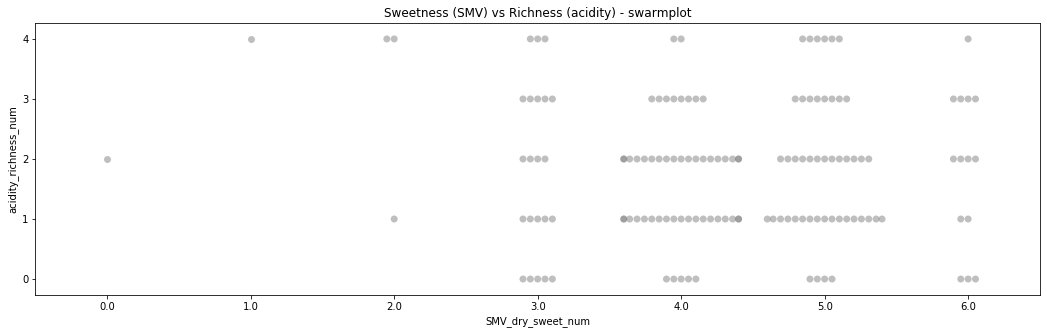

In [20]:
fig, ax = plt.subplots(figsize=(18,5))

ax = sns.swarmplot(data=df, x='SMV_dry_sweet_num', y='acidity_richness_num', color='grey',
                   size=7, alpha=0.5)
ax.set_title('Sweetness (SMV) vs Richness (acidity) - swarmplot')

plt.savefig("sweetness-vs-richness.pdf",  bbox_inches='tight')

Text(0.5, 1.0, 'Sweetness (SMV) vs Richness (acidity) - stripplot')

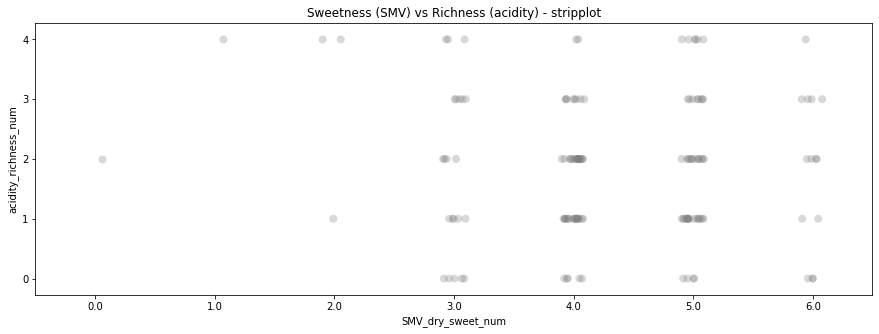

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.stripplot(x='SMV_dry_sweet_num', y='acidity_richness_num', data=df, jitter=True,
                   color='grey',
                  size=8, alpha=0.3)
ax.set_title('Sweetness (SMV) vs Richness (acidity) - stripplot')

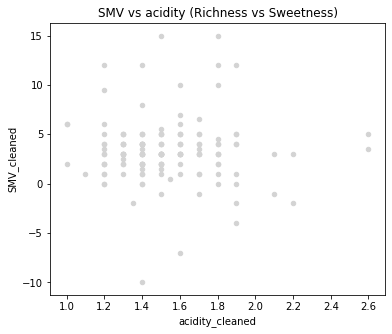

In [22]:
ax = df.plot(y='SMV_cleaned', x='acidity_cleaned', kind='scatter',\
                                            figsize=(6,5), title='SMV vs acidity (Richness vs Sweetness)', \
                                            color='lightgrey')

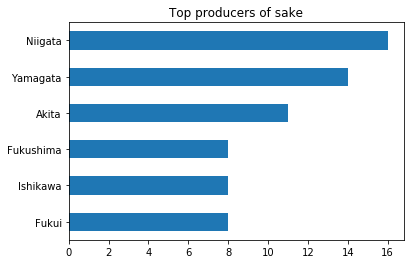

In [23]:
df.prefecture.value_counts().head(6).sort_values().plot(kind='barh',
                                                        title='Top producers of sake')

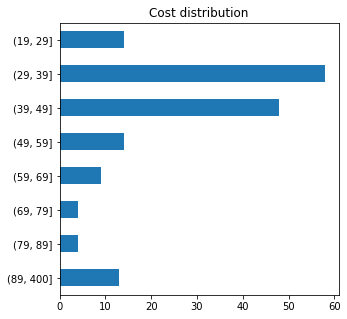

In [24]:
binned = pd.cut(df.cost_cleaned, [19, 29, 39, 49, 59, 69, 79, 89, 400])
binned.value_counts().sort_index(ascending=False).plot(kind='barh', title='Cost distribution',
                                       figsize=(5, 5))

plt.savefig("farview-cost.pdf",  bbox_inches='tight')

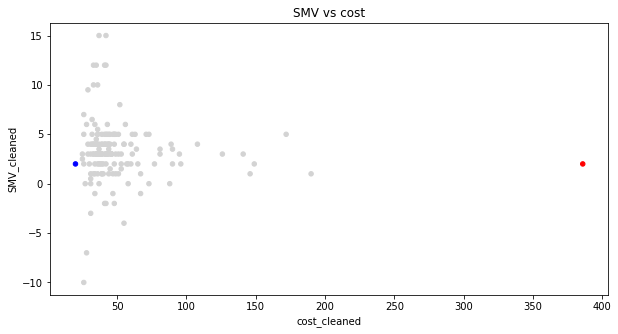

In [80]:
def build_colors(row):
    if row['cost_cleaned'] > 380:
        return 'red'
    elif row['cost_cleaned'] < 21:
        return 'blue'
    else:
        return 'lightgrey'

colors = df.reset_index().apply(build_colors, axis=1)

binned = pd.cut(df.cost_cleaned, [19, 29, 39, 49, 59, 69, 79, 89, 400])
df.plot(x='cost_cleaned', y='SMV_cleaned', kind='scatter',
       title='SMV vs cost',
       figsize=(10,5),
       color=colors)

plt.savefig("SMV-vs-cost.pdf",  bbox_inches='tight')

In [130]:
most_expensive = df.sort_values(by='cost_cleaned',ascending=False).head(10)
most_expensive.head(7)

,name,sake_type,slug,sake_type_cleaned,prefecture,cost_cleaned,vol,SMV,acidity,alcohol,amino_acid,polish,rice,yeast,nama,nigori,genshu,SMV_cleaned,acidity_cleaned,alcohol_cleaned,amino_acid_cleaned,polish_cleaned,SMV_dry_sweet_bins,SMV_dry_sweet,acidity_richness_bins,acidity_richness,yamada_nishiki,gohyaku_mangoku
58,"Tatsuriki ""Akitsu""",Junmai Daiginjo - Hyogo,shop_all.php?prod_id=236,Junmai Daiginjo,Hyogo,385.99,720.0,+2,na,16%,na,35%,Yamada Nishiki,#9,0,0,0,2.0,NaN,16.0,NaN,35.0,"(1.4, 3.4]",4slightly_dry,NaN,NaN,1,0
46,Kyokusen,Junmai Daiginjo - Iwate,shop_all.php?prod_id=221,Junmai Daiginjo,Iwate,189.99,720.0,+1,1.3,16-17%,0.9,40%,Yamada Nishiki,#9,0,0,0,1.0,1.3,16.5,0.9,40.0,"(-1.4, 1.4]",3neutral,"(1.2, 1.4]",1light,1,0
51,"Otokoyama ""Man's Mountain""",Junmai Daiginjo - Hokkaido,shop_all.php?prod_id=64,Junmai Daiginjo,Hokkaido,171.99,720.0,+5,1.3,16-17%,na,38%,Yamada Nishiki,#9,0,0,0,5.0,1.3,16.5,NaN,38.0,"(3.4, 5.9]",5dry,"(1.2, 1.4]",1light,1,0
60,Tatenokawa 18,Junmai Daiginjo - Yamagata,shop_all.php?prod_id=265,Junmai Daiginjo,Yamagata,155.99,720.0,na,1.5,16-17%,1,18%,Yamada Nishiki,Yamagata Prefecture Proprietary,0,0,0,NaN,1.5,16.5,1.0,18.0,NaN,NaN,"(1.4, 1.6]",2neutral,1,0
57,"Urakasumi ""M""",Junmai Daiginjo - Miyagi,shop_all.php?prod_id=266,Junmai Daiginjo,Miyagi,148.99,720.0,+2,1.5,16-17%,na,45%,Yamada Nishiki,Proprietary Yeast,0,0,0,2.0,1.5,16.5,NaN,45.0,"(1.4, 3.4]",4slightly_dry,"(1.4, 1.6]",2neutral,1,0
48,"Kotsuzumi Rojo Hana Ari ""Bloom on the Path""",Junmai Daiginjo - Hyogo,shop_all.php?prod_id=191,Junmai Daiginjo,Hyogo,145.99,720.0,+1,1.4,16%,na,50%,Yamada Nishiki,Kura Yeast,0,0,0,1.0,1.4,16.0,NaN,50.0,"(-1.4, 1.4]",3neutral,"(1.2, 1.4]",1light,1,0
55,Watari Bune,Junmai Daiginjo - Ibaraki,shop_all.php?prod_id=89,Junmai Daiginjo,Ibaraki,140.99,720.0,+3,1.4,16-17%,1,35%,Wataribune,#9,0,0,0,3.0,1.4,16.5,1.0,35.0,"(1.4, 3.4]",4slightly_dry,"(1.2, 1.4]",1light,0,0


In [129]:
most_expensive_list

['Tatsuriki "Akitsu"',
 'Kyokusen',
 'Otokoyama  "Man\'s Mountain"',
 'Tatenokawa 18',
 'Urakasumi "M"',
 'Kotsuzumi Rojo Hana Ari "Bloom on the Path"',
 'Watari Bune',
 'Isojiman Junmai Daiginjo 50',
 'Kokuryu Ryu',
 'Taiheizan Tenko']

In [131]:
# Sources: Amazon, kakaku.com

most_expensive_dict = {'Tatsuriki "Akitsu"': 16200,
#https://isetan.mistore.jp/onlinestore/product/0110900000000000000000234424.html?cid=c_s00_a2_af01_Aci1ml%2FNYTA_0
                       
 'Kyokusen': 5188,
#http://sake-marukei.com/?pid=125900998
                       
 'Otokoyama  "Man\'s Mountain"': 5237,
#https://kakaku.com/item/S0000152219/
 'Tatenokawa 18': 10800,
#http://www.tatenokawa.jp/ja/sake/products/detail.html?id=1317942772

'Kotsuzumi Rojo Hana Ari "Bloom on the Path"': 5400
# https://craviton.com/products/detail/2010    
}

In [132]:
most_expensive_prices = pd.DataFrame(most_expensive_dict.items()).rename(columns={0:'name', 1:'price_yen'})
most_expensive_prices

,name,price_yen
0,"Tatsuriki ""Akitsu""",16200
1,Kyokusen,5188
2,"Otokoyama ""Man's Mountain""",5237
3,Tatenokawa 18,10800
4,"Kotsuzumi Rojo Hana Ari ""Bloom on the Path""",5400


In [133]:
most_expensive_pricedif = most_expensive.merge(most_expensive_prices, left_on='name', right_on='name')
most_expensive_pricedif

,name,sake_type,slug,sake_type_cleaned,prefecture,cost_cleaned,vol,SMV,acidity,alcohol,amino_acid,polish,rice,yeast,nama,nigori,genshu,SMV_cleaned,acidity_cleaned,alcohol_cleaned,amino_acid_cleaned,polish_cleaned,SMV_dry_sweet_bins,SMV_dry_sweet,acidity_richness_bins,acidity_richness,yamada_nishiki,gohyaku_mangoku,price_yen
0,"Tatsuriki ""Akitsu""",Junmai Daiginjo - Hyogo,shop_all.php?prod_id=236,Junmai Daiginjo,Hyogo,385.99,720.0,+2,na,16%,na,35%,Yamada Nishiki,#9,0,0,0,2.0,NaN,16.0,NaN,35.0,"(1.4, 3.4]",4slightly_dry,NaN,NaN,1,0,16200
1,Kyokusen,Junmai Daiginjo - Iwate,shop_all.php?prod_id=221,Junmai Daiginjo,Iwate,189.99,720.0,+1,1.3,16-17%,0.9,40%,Yamada Nishiki,#9,0,0,0,1.0,1.3,16.5,0.9,40.0,"(-1.4, 1.4]",3neutral,"(1.2, 1.4]",1light,1,0,5188
2,"Otokoyama ""Man's Mountain""",Junmai Daiginjo - Hokkaido,shop_all.php?prod_id=64,Junmai Daiginjo,Hokkaido,171.99,720.0,+5,1.3,16-17%,na,38%,Yamada Nishiki,#9,0,0,0,5.0,1.3,16.5,NaN,38.0,"(3.4, 5.9]",5dry,"(1.2, 1.4]",1light,1,0,5237
3,Tatenokawa 18,Junmai Daiginjo - Yamagata,shop_all.php?prod_id=265,Junmai Daiginjo,Yamagata,155.99,720.0,na,1.5,16-17%,1,18%,Yamada Nishiki,Yamagata Prefecture Proprietary,0,0,0,NaN,1.5,16.5,1.0,18.0,NaN,NaN,"(1.4, 1.6]",2neutral,1,0,10800
4,"Kotsuzumi Rojo Hana Ari ""Bloom on the Path""",Junmai Daiginjo - Hyogo,shop_all.php?prod_id=191,Junmai Daiginjo,Hyogo,145.99,720.0,+1,1.4,16%,na,50%,Yamada Nishiki,Kura Yeast,0,0,0,1.0,1.4,16.0,NaN,50.0,"(-1.4, 1.4]",3neutral,"(1.2, 1.4]",1light,1,0,5400


## Convert yen to USD

0.0093 United States Dollar

In [134]:
most_expensive_pricedif['price_in_japan'] = 0.0093 * most_expensive_pricedif.price_yen

In [135]:
most_expensive_pricedif['price_dif'] = most_expensive_pricedif.cost_cleaned - most_expensive_pricedif.price_in_japan
most_expensive_pricedif = most_expensive_pricedif.sort_values('price_dif').reset_index()

In [139]:
most_expensive_pricedif['markup'] = \
        (most_expensive_pricedif.cost_cleaned - most_expensive_pricedif.price_in_japan)/ \
        most_expensive_pricedif.price_in_japan * 100
most_expensive_pricedif.sort_values('cost_cleaned', ascending=False)

,index,name,sake_type,slug,sake_type_cleaned,prefecture,cost_cleaned,vol,SMV,acidity,alcohol,amino_acid,polish,rice,yeast,nama,nigori,genshu,SMV_cleaned,acidity_cleaned,alcohol_cleaned,amino_acid_cleaned,polish_cleaned,SMV_dry_sweet_bins,SMV_dry_sweet,acidity_richness_bins,acidity_richness,yamada_nishiki,gohyaku_mangoku,price_yen,price_in_japan,price_dif,markup
4,0,"Tatsuriki ""Akitsu""",Junmai Daiginjo - Hyogo,shop_all.php?prod_id=236,Junmai Daiginjo,Hyogo,385.99,720.0,+2,na,16%,na,35%,Yamada Nishiki,#9,0,0,0,2.0,NaN,16.0,NaN,35.0,"(1.4, 3.4]",4slightly_dry,NaN,NaN,1,0,16200,150.6600,235.3300,156.199389
3,1,Kyokusen,Junmai Daiginjo - Iwate,shop_all.php?prod_id=221,Junmai Daiginjo,Iwate,189.99,720.0,+1,1.3,16-17%,0.9,40%,Yamada Nishiki,#9,0,0,0,1.0,1.3,16.5,0.9,40.0,"(-1.4, 1.4]",3neutral,"(1.2, 1.4]",1light,1,0,5188,48.2484,141.7416,293.774716
2,2,"Otokoyama ""Man's Mountain""",Junmai Daiginjo - Hokkaido,shop_all.php?prod_id=64,Junmai Daiginjo,Hokkaido,171.99,720.0,+5,1.3,16-17%,na,38%,Yamada Nishiki,#9,0,0,0,5.0,1.3,16.5,NaN,38.0,"(3.4, 5.9]",5dry,"(1.2, 1.4]",1light,1,0,5237,48.7041,123.2859,253.132488
0,3,Tatenokawa 18,Junmai Daiginjo - Yamagata,shop_all.php?prod_id=265,Junmai Daiginjo,Yamagata,155.99,720.0,na,1.5,16-17%,1,18%,Yamada Nishiki,Yamagata Prefecture Proprietary,0,0,0,NaN,1.5,16.5,1.0,18.0,NaN,NaN,"(1.4, 1.6]",2neutral,1,0,10800,100.4400,55.5500,55.306651
1,4,"Kotsuzumi Rojo Hana Ari ""Bloom on the Path""",Junmai Daiginjo - Hyogo,shop_all.php?prod_id=191,Junmai Daiginjo,Hyogo,145.99,720.0,+1,1.4,16%,na,50%,Yamada Nishiki,Kura Yeast,0,0,0,1.0,1.4,16.0,NaN,50.0,"(-1.4, 1.4]",3neutral,"(1.2, 1.4]",1light,1,0,5400,50.2200,95.7700,190.700916


In [155]:
most_expensive_pricedif[['name', 'markup', 'cost_cleaned', 'price_in_japan']]

,name,markup,cost_cleaned,price_in_japan
0,Tatenokawa 18,55.306651,155.99,100.4400
1,"Kotsuzumi Rojo Hana Ari ""Bloom on the Path""",190.700916,145.99,50.2200
2,"Otokoyama ""Man's Mountain""",253.132488,171.99,48.7041
3,Kyokusen,293.774716,189.99,48.2484
4,"Tatsuriki ""Akitsu""",156.199389,385.99,150.6600


Text(0.5, 1.0, 'Price difference for top 10 most expensive sakes sold on NYC Sakagura')

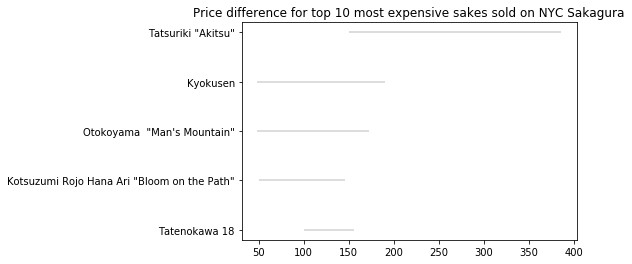

In [140]:
fig, ax = plt.subplots()
ax.hlines(xmin=most_expensive_pricedif['price_in_japan'], 
          xmax=most_expensive_pricedif['cost_cleaned'], y=most_expensive_pricedif.index,
          color='lightgrey')

ax.set_yticks(most_expensive_pricedif.index)
ax.yaxis.set_ticklabels(most_expensive_pricedif['name'])
ax.set_title('Price difference for top 10 most expensive sakes sold on NYC Sakagura')

# plt.savefig('top10_price_dif_edited.pdf', bbox_inches='tight')

In [ ]:
most_expensive.plot(kind='scatter', x='cost_cleaned', y='SMV_cleaned', 
                    title='SMV of 10 most expensive sake')

In [ ]:
most_expensive.plot(kind='scatter', x='cost_cleaned', y='acidity_cleaned', 
                    title='Acidity of 10 most expensive sake')

In [ ]:
most_expensive.prefecture.value_counts().plot(kind='barh', 
                    title='Producers of 10 most expensive sake')

# Cheapest sake

実楽
由利正宗

In [141]:
cheapest = df.sort_values(by='cost_cleaned',ascending=True).head(10)
cheapest

,name,sake_type,slug,sake_type_cleaned,prefecture,cost_cleaned,vol,SMV,acidity,alcohol,amino_acid,polish,rice,yeast,nama,nigori,genshu,SMV_cleaned,acidity_cleaned,alcohol_cleaned,amino_acid_cleaned,polish_cleaned,SMV_dry_sweet_bins,SMV_dry_sweet,acidity_richness_bins,acidity_richness,yamada_nishiki,gohyaku_mangoku
160,Jitsuraku,Tokubetsu Junmai Kimoto - Hyogo,shop_all.php?prod_id=211,Tokubetsu Junmai,Hyogo,19.99,720.0,+2,1.8,14.5%,na,70%,Yamada Nishiki,Proprietary,0,0,0,2.0,1.8,14.5,NaN,70.0,"(1.4, 3.4]",4slightly_dry,"(1.6, 1.8]",3rich,1,0
111,Ume no Yado,Junmai Ginjo - Nara,shop_all.php?prod_id=162,Junmai Ginjo,Nara,24.99,720.0,+3,1.5,17-18%,na,50%,Yamada Nishiki,na,0,0,0,3.0,1.5,17.5,NaN,50.0,"(1.4, 3.4]",4slightly_dry,"(1.4, 1.6]",2neutral,1,0
7,Yuri Masamune,Futsu-shu - Akita,shop_all.php?prod_id=93,Futsu-shu,Akita,24.99,720.0,+2.5,1.3,15%,1.0,68%,Hitomibore,Brewer's Proprietary,0,0,0,2.5,1.3,15.0,1.0,68.0,"(1.4, 3.4]",4slightly_dry,"(1.2, 1.4]",1light,0,0
132,Kurosawa,Junmai Kimoto - Nagano,shop_all.php?prod_id=193,Junmai,Nagano,25.99,720.0,+2,na,15-16%,na,65%,Miyama Nishiki,na,0,0,0,2.0,NaN,15.5,NaN,65.0,"(1.4, 3.4]",4slightly_dry,NaN,NaN,0,0
143,Tateyama Tokubetsu Honjozo,Tokubetsu Honjozo - Toyama,shop_all.php?prod_id=274,Tokubetsu Honjozo,Toyama,25.99,720.0,+5,NaN,15-16%,NaN,58%,"Yamada Nishiki, Gohyaku Mangoku, Dewasansan",NaN,0,0,0,5.0,NaN,15.5,NaN,58.0,"(3.4, 5.9]",5dry,NaN,NaN,1,1
126,Kinpou Shizenshu,Junmai Yamahai - Fukushima,shop_all.php?prod_id=278,Junmai,Fukushima,25.99,720.0,-10,1.4,13-14%,1.8,70%,Yume no Kou & Toyo Nishiki,NaN,0,0,0,-10.0,1.4,13.5,1.8,70.0,NaN,NaN,"(1.2, 1.4]",1light,0,0
155,"Suigei ""Drunken Whale""",Tokubetsu Junmai - Kochi,shop_all.php?prod_id=75,Tokubetsu Junmai,Kochi,25.99,720.0,+7,1.6,15-16%,1.2,55%,Akitsuho,na,0,0,0,7.0,1.6,15.5,1.2,55.0,"(5.9, 15.0]",6very_dry,"(1.4, 1.6]",2neutral,0,0
142,Yoshinosugi Taruzake,Taru Futsu - Nara,shop_all.php?prod_id=233,Futsu-shu,Nara,26.99,720.0,0,1.2,15-16%,1.0,70%,Yamada Nishiki,Proprietary,0,0,0,0.0,1.2,15.5,1.0,70.0,"(-1.4, 1.4]",3neutral,"(1.0, 1.2]",0very_light,1,0
16,"Ban Ryu ""The Thousand Ways""",Honjozo - Yamagata,shop_all.php?prod_id=96,Honjozo,Yamagata,26.99,720.0,na,na,15.3%,na,na,na,na,0,0,0,NaN,NaN,15.3,NaN,NaN,NaN,NaN,NaN,NaN,0,0
125,Yamato Shizuku,Junmai Kimoto - Akita,shop_all.php?prod_id=263,Junmai,Akita,27.99,720.0,+6,1.6,16%,1.2,60%,Akita Sake Komachi,#901,0,0,0,6.0,1.6,16.0,1.2,60.0,"(5.9, 15.0]",6very_dry,"(1.4, 1.6]",2neutral,0,0


In [40]:
# Sources: Amazon, kakaku.com, rakuten, Websites of sake producers

cheapest_list = list(cheapest.name)
cheapest_price = [1100, np.nan, 1541, np.nan, 2502, 1300, 1134]
cheapest_dict = dict(zip(cheapest_list, cheapest_price))



suigei 1134
https://ck.jp.ap.valuecommerce.com/servlet/referral?sid=2327384&pid=874652877&vc_url=https%3a%2f%2fstore.shopping.yahoo.co.jp%2frakuiti-sake%2f10574.html&vcptn=22BE4AE1c76e040616554218761295000010000000000000

kinpou shizenshu 1300 non-tax

https://www.shidukuya.co.jp/SHOP/kinpou030.html


tateyama 2502

https://www.sakesake.com/item/kurabetu1/26/1-26-3.html

yuri masamune NA - none for 720ml

jitsuraku 1100
http://www.sawanotsuru.co.jp/site/junmaishu/jitsuraku/


Yoshinosugi Taruzake 1020
http://www.choryo.co.jp/fs/kurashop/taruzake/taruzake720

In [142]:
# Sources: Amazon, kakaku.com

cheapest_dict = {'Jitsuraku': 1100,
                 'Yoshinosugi Taruzake': 1020,
 'Tateyama Tokubetsu Honjozo': 2502,
 'Kinpou Shizenshu': 1300,
'Suigei "Drunken Whale"': 1134

}

In [143]:
cheapest_prices = pd.DataFrame(cheapest_dict.items()).rename(columns={0:'name', 1:'price_yen'})
cheapest_prices.sort_values('price_yen')

,name,price_yen
1,Yoshinosugi Taruzake,1020
0,Jitsuraku,1100
4,"Suigei ""Drunken Whale""",1134
3,Kinpou Shizenshu,1300
2,Tateyama Tokubetsu Honjozo,2502


In [144]:
cheapest_pricedif = cheapest.merge(cheapest_prices, left_on='name', right_on='name')
cheapest_pricedif

,name,sake_type,slug,sake_type_cleaned,prefecture,cost_cleaned,vol,SMV,acidity,alcohol,amino_acid,polish,rice,yeast,nama,nigori,genshu,SMV_cleaned,acidity_cleaned,alcohol_cleaned,amino_acid_cleaned,polish_cleaned,SMV_dry_sweet_bins,SMV_dry_sweet,acidity_richness_bins,acidity_richness,yamada_nishiki,gohyaku_mangoku,price_yen
0,Jitsuraku,Tokubetsu Junmai Kimoto - Hyogo,shop_all.php?prod_id=211,Tokubetsu Junmai,Hyogo,19.99,720.0,+2,1.8,14.5%,na,70%,Yamada Nishiki,Proprietary,0,0,0,2.0,1.8,14.5,NaN,70.0,"(1.4, 3.4]",4slightly_dry,"(1.6, 1.8]",3rich,1,0,1100
1,Tateyama Tokubetsu Honjozo,Tokubetsu Honjozo - Toyama,shop_all.php?prod_id=274,Tokubetsu Honjozo,Toyama,25.99,720.0,+5,NaN,15-16%,NaN,58%,"Yamada Nishiki, Gohyaku Mangoku, Dewasansan",NaN,0,0,0,5.0,NaN,15.5,NaN,58.0,"(3.4, 5.9]",5dry,NaN,NaN,1,1,2502
2,Kinpou Shizenshu,Junmai Yamahai - Fukushima,shop_all.php?prod_id=278,Junmai,Fukushima,25.99,720.0,-10,1.4,13-14%,1.8,70%,Yume no Kou & Toyo Nishiki,NaN,0,0,0,-10.0,1.4,13.5,1.8,70.0,NaN,NaN,"(1.2, 1.4]",1light,0,0,1300
3,"Suigei ""Drunken Whale""",Tokubetsu Junmai - Kochi,shop_all.php?prod_id=75,Tokubetsu Junmai,Kochi,25.99,720.0,+7,1.6,15-16%,1.2,55%,Akitsuho,na,0,0,0,7.0,1.6,15.5,1.2,55.0,"(5.9, 15.0]",6very_dry,"(1.4, 1.6]",2neutral,0,0,1134
4,Yoshinosugi Taruzake,Taru Futsu - Nara,shop_all.php?prod_id=233,Futsu-shu,Nara,26.99,720.0,0,1.2,15-16%,1.0,70%,Yamada Nishiki,Proprietary,0,0,0,0.0,1.2,15.5,1.0,70.0,"(-1.4, 1.4]",3neutral,"(1.0, 1.2]",0very_light,1,0,1020


## Convert yen to USD

0.0093 United States Dollar

In [145]:
cheapest_pricedif['price_in_japan'] = 0.0093 * cheapest_pricedif.price_yen

In [147]:
cheapest['price_dif'] = cheapest_pricedif.cost_cleaned - cheapest_pricedif.price_in_japan

In [154]:
cheapest_pricedif['markup'] = \
        (cheapest_pricedif.cost_cleaned - cheapest_pricedif.price_in_japan)/ \
        cheapest_pricedif.price_in_japan * 100
cheapest_pricedif.sort_values('cost_cleaned', ascending=False)

cheapest_pricedif[['name', 'markup', 'cost_cleaned', 'price_in_japan']]

,name,markup,cost_cleaned,price_in_japan
0,Jitsuraku,95.405670,19.99,10.2300
1,Tateyama Tokubetsu Honjozo,11.695590,25.99,23.2686
2,Kinpou Shizenshu,114.971050,25.99,12.0900
3,"Suigei ""Drunken Whale""",146.439476,25.99,10.5462
4,Yoshinosugi Taruzake,184.524563,26.99,9.4860


In [153]:
cheapest_pricedif.sort_values('cost_cleaned', ascending=False)

,name,sake_type,slug,sake_type_cleaned,prefecture,cost_cleaned,vol,SMV,acidity,alcohol,amino_acid,polish,rice,yeast,nama,nigori,genshu,SMV_cleaned,acidity_cleaned,alcohol_cleaned,amino_acid_cleaned,polish_cleaned,SMV_dry_sweet_bins,SMV_dry_sweet,acidity_richness_bins,acidity_richness,yamada_nishiki,gohyaku_mangoku,price_yen,price_in_japan,markup
4,Yoshinosugi Taruzake,Taru Futsu - Nara,shop_all.php?prod_id=233,Futsu-shu,Nara,26.99,720.0,0,1.2,15-16%,1.0,70%,Yamada Nishiki,Proprietary,0,0,0,0.0,1.2,15.5,1.0,70.0,"(-1.4, 1.4]",3neutral,"(1.0, 1.2]",0very_light,1,0,1020,9.4860,184.524563
1,Tateyama Tokubetsu Honjozo,Tokubetsu Honjozo - Toyama,shop_all.php?prod_id=274,Tokubetsu Honjozo,Toyama,25.99,720.0,+5,NaN,15-16%,NaN,58%,"Yamada Nishiki, Gohyaku Mangoku, Dewasansan",NaN,0,0,0,5.0,NaN,15.5,NaN,58.0,"(3.4, 5.9]",5dry,NaN,NaN,1,1,2502,23.2686,11.695590
2,Kinpou Shizenshu,Junmai Yamahai - Fukushima,shop_all.php?prod_id=278,Junmai,Fukushima,25.99,720.0,-10,1.4,13-14%,1.8,70%,Yume no Kou & Toyo Nishiki,NaN,0,0,0,-10.0,1.4,13.5,1.8,70.0,NaN,NaN,"(1.2, 1.4]",1light,0,0,1300,12.0900,114.971050
3,"Suigei ""Drunken Whale""",Tokubetsu Junmai - Kochi,shop_all.php?prod_id=75,Tokubetsu Junmai,Kochi,25.99,720.0,+7,1.6,15-16%,1.2,55%,Akitsuho,na,0,0,0,7.0,1.6,15.5,1.2,55.0,"(5.9, 15.0]",6very_dry,"(1.4, 1.6]",2neutral,0,0,1134,10.5462,146.439476
0,Jitsuraku,Tokubetsu Junmai Kimoto - Hyogo,shop_all.php?prod_id=211,Tokubetsu Junmai,Hyogo,19.99,720.0,+2,1.8,14.5%,na,70%,Yamada Nishiki,Proprietary,0,0,0,2.0,1.8,14.5,NaN,70.0,"(1.4, 3.4]",4slightly_dry,"(1.6, 1.8]",3rich,1,0,1100,10.2300,95.405670


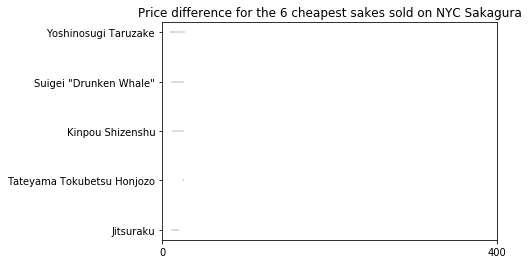

In [150]:
fig, ax = plt.subplots()
ax.hlines(xmin=cheapest_pricedif['price_in_japan'], 
          xmax=cheapest_pricedif['cost_cleaned'], y=cheapest_pricedif.index,
          color='lightgrey')

ax.set_yticks(cheapest_pricedif.index)
ax.yaxis.set_ticklabels(cheapest_pricedif['name'])
ax.set_title('Price difference for the 6 cheapest sakes sold on NYC Sakagura')

ax.set_xticks([0, 400])
plt.savefig('cheapest_price_dif_correct.pdf', bbox_inches='tight')

# Search for sake by name

In [128]:
df[df.name.str.contains('kyokusen', case=False)]

,name,sake_type,slug,sake_type_cleaned,prefecture,cost_cleaned,vol,SMV,acidity,alcohol,amino_acid,polish,rice,yeast,nama,nigori,genshu,SMV_cleaned,acidity_cleaned,alcohol_cleaned,amino_acid_cleaned,polish_cleaned,SMV_dry_sweet_bins,SMV_dry_sweet,acidity_richness_bins,acidity_richness,yamada_nishiki,gohyaku_mangoku
46,Kyokusen,Junmai Daiginjo - Iwate,shop_all.php?prod_id=221,Junmai Daiginjo,Iwate,189.99,720.0,+1,1.3,16-17%,0.9,40%,Yamada Nishiki,#9,0,0,0,1.0,1.3,16.5,0.9,40.0,"(-1.4, 1.4]",3neutral,"(1.2, 1.4]",1light,1,0


# Polish vs SMV

In [88]:
df.sort_values('polish_cleaned')

,name,sake_type,slug,sake_type_cleaned,prefecture,cost_cleaned,vol,SMV,acidity,alcohol,amino_acid,polish,rice,yeast,nama,nigori,genshu,SMV_cleaned,acidity_cleaned,alcohol_cleaned,amino_acid_cleaned,polish_cleaned,SMV_dry_sweet_bins,SMV_dry_sweet,acidity_richness_bins,acidity_richness,SMV_dry_sweet_num,acidity_richness_num
60,Tatenokawa 18,Junmai Daiginjo - Yamagata,shop_all.php?prod_id=265,Junmai Daiginjo,Yamagata,155.99,720.0,na,1.5,16-17%,1,18%,Yamada Nishiki,Yamagata Prefecture Proprietary,0,0,0,NaN,1.5,16.5,1.0,18.0,NaN,NaN,"(1.4, 1.6]",2neutral,NaN,2.0
47,"Dassai 23 ""Otter Fest""",Junmai Daiginjo - Yamaguchi,shop_all.php?prod_id=11,Junmai Daiginjo,Yamaguchi,80.99,720.0,+3,1.3,15-16%,na,23%,Yamada Nishiki,na,0,0,0,3.0,1.3,15.5,NaN,23.0,"(1.4, 3.4]",4slightly_dry,"(1.2, 1.4]",1light,4.0,1.0
59,Tatenokawa 33,Junmai Daiginjo - Yamagata,shop_all.php?prod_id=291,Junmai Daiginjo,Yamagata,60.99,720.0,+3,1.5,15-16%,1,33%,Dewasansan,Yamagata Prefecture Proprietary,0,0,0,3.0,1.5,15.5,1.0,33.0,"(1.4, 3.4]",4slightly_dry,"(1.4, 1.6]",2neutral,4.0,2.0
45,Kubota Manju,Junmai Daiginjo - Niigata,shop_all.php?prod_id=149,Junmai Daiginjo,Niigata,89.99,720.0,+2,1.2,15-16%,na,35%,Gohyaku Mangoku,na,0,0,0,2.0,1.2,15.5,NaN,35.0,"(1.4, 3.4]",4slightly_dry,"(1.0, 1.2]",0very_light,4.0,0.0
58,"Tatsuriki ""Akitsu""",Junmai Daiginjo - Hyogo,shop_all.php?prod_id=236,Junmai Daiginjo,Hyogo,385.99,720.0,+2,na,16%,na,35%,Yamada Nishiki,#9,0,0,0,2.0,NaN,16.0,NaN,35.0,"(1.4, 3.4]",4slightly_dry,NaN,NaN,4.0,NaN
55,Watari Bune,Junmai Daiginjo - Ibaraki,shop_all.php?prod_id=89,Junmai Daiginjo,Ibaraki,140.99,720.0,+3,1.4,16-17%,1,35%,Wataribune,#9,0,0,0,3.0,1.4,16.5,1.0,35.0,"(1.4, 3.4]",4slightly_dry,"(1.2, 1.4]",1light,4.0,1.0
1,Suirakuten,Daiginjo - Akita,shop_all.php?prod_id=151,Daiginjo,Akita,88.99,720.0,+3 - +5,1.1 - 1.3,15-16%,na,38%,Yamada Nishiki,#9,0,0,0,4.0,1.2,15.5,NaN,38.0,"(3.4, 5.9]",5dry,"(1.0, 1.2]",0very_light,5.0,0.0
51,"Otokoyama ""Man's Mountain""",Junmai Daiginjo - Hokkaido,shop_all.php?prod_id=64,Junmai Daiginjo,Hokkaido,171.99,720.0,+5,1.3,16-17%,na,38%,Yamada Nishiki,#9,0,0,0,5.0,1.3,16.5,NaN,38.0,"(3.4, 5.9]",5dry,"(1.2, 1.4]",1light,5.0,1.0
0,Nanbu Bijin,Daiginjo - Iwate,shop_all.php?prod_id=195,Daiginjo,Iwate,70.99,720.0,+5,1.3,16-17%,na,40%,Gin Otome,Iwate #2 & #1601,0,0,0,5.0,1.3,16.5,NaN,40.0,"(3.4, 5.9]",5dry,"(1.2, 1.4]",1light,5.0,1.0
56,Wakatake Onikoroshi,Junmai Daiginjo - Shizuoka,shop_all.php?prod_id=88,Junmai Daiginjo,Shizuoka,57.99,720.0,0,1.4,16-17%,na,40%,Yamada Nishiki,Shizuoka HD-1,0,0,0,0.0,1.4,16.5,NaN,40.0,"(-1.4, 1.4]",3neutral,"(1.2, 1.4]",1light,3.0,1.0


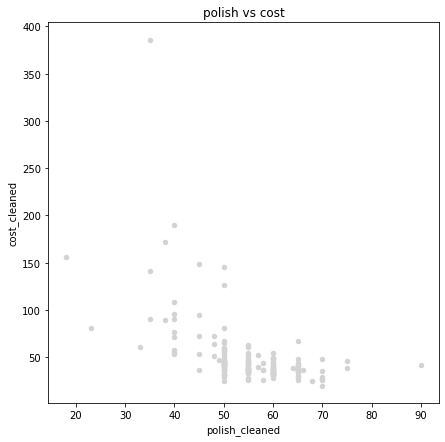

In [90]:
ax = df.plot(x='polish_cleaned', y='cost_cleaned', kind='scatter',\
                                            figsize=(7,7), title='polish vs cost', \
                                            color='lightgrey')

plt.savefig("polish-cost.pdf",  bbox_inches='tight')

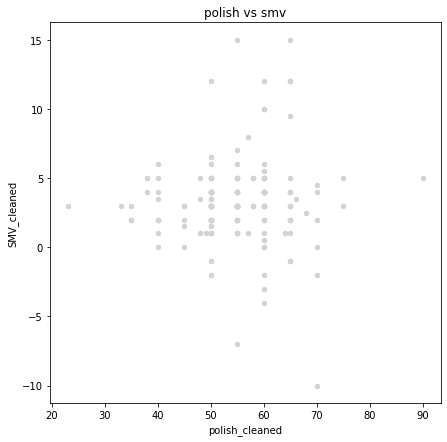

In [92]:
ax = df.plot(x='polish_cleaned', y='SMV_cleaned', kind='scatter',\
                                            figsize=(7,7), title='polish vs smv', \
                                            color='lightgrey')

plt.savefig("polish-smv.pdf",  bbox_inches='tight')

In [93]:
df.sake_type_cleaned.value_counts()

Junmai Ginjo               47
Junmai                     44
Junmai Daiginjo            29
Tokubetsu Junmai           21
Ginjo                       8
Daiginjo                    7
Honjozo                     3
Futsu-shu                   2
Junmai Ginjo  Genshu        1
Junmai Daiginjo  Genshu     1
Tokubetsu Honjozo           1
Name: sake_type_cleaned, dtype: int64

In [117]:
df.polish_cleaned.max()

90.0

In [121]:
df[df.name.str.contains('Kyokusen')]

,name,sake_type,slug,sake_type_cleaned,prefecture,cost_cleaned,vol,SMV,acidity,alcohol,amino_acid,polish,rice,yeast,nama,nigori,genshu,SMV_cleaned,acidity_cleaned,alcohol_cleaned,amino_acid_cleaned,polish_cleaned,SMV_dry_sweet_bins,SMV_dry_sweet,acidity_richness_bins,acidity_richness,yamada_nishiki,gohyaku_mangoku
46,Kyokusen,Junmai Daiginjo - Iwate,shop_all.php?prod_id=221,Junmai Daiginjo,Iwate,189.99,720.0,+1,1.3,16-17%,0.9,40%,Yamada Nishiki,#9,0,0,0,1.0,1.3,16.5,0.9,40.0,"(-1.4, 1.4]",3neutral,"(1.2, 1.4]",1light,1,0


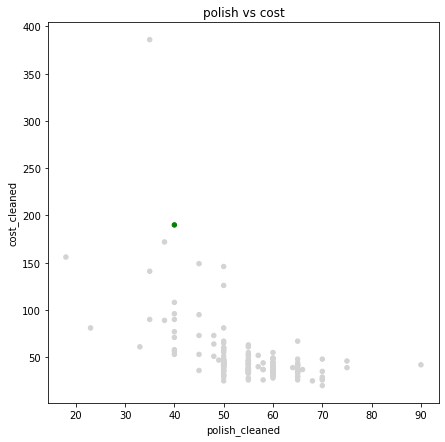

In [127]:
def build_colors(row):
#     if 'Daiginjo' in row['sake_type_cleaned']:
#         return 'navy'
#     elif row['sake_type_cleaned'] == 'Junmai':
#         return 'red'
#     elif 'Ginjo' in row['sake_type_cleaned']:
#         return 'red'
#     elif row['sake_type_cleaned'] == 'Tokubtsu Junmai':
# #         return 'red'
#     elif row['sake_type_cleaned'] == 'Tokubetsu Honjozo':
# #         return 'red'
    if row['name'] == 'Kyokusen':
        return 'green'
    else:
        return 'lightgrey'

colors = df.reset_index().apply(build_colors, axis=1)

ax = df.plot(x='polish_cleaned', y='cost_cleaned', kind='scatter',\
                                            figsize=(7,7), title='polish vs cost', \
                                            color=colors)


# plt.savefig("polish-cost-type-reverse.pdf",  bbox_inches='tight')

# Rice type vs polish and/or cost

In [104]:
df.yamada_nishiki.value_counts()

0    98
1    66
Name: yamada_nishiki, dtype: int64

In [105]:
df.gohyaku_mangoku.value_counts()

0    130
1     34
Name: gohyaku_mangoku, dtype: int64

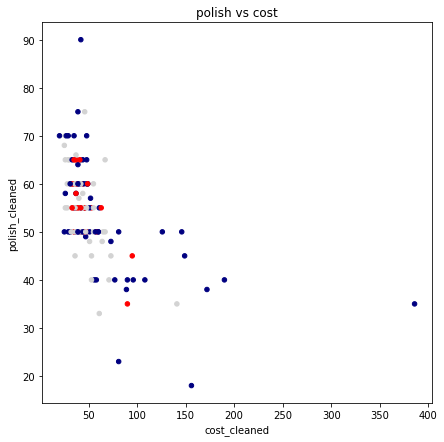

In [111]:
def build_colors(row):
    if row['yamada_nishiki'] == 1:
        return 'navy'
    elif row['gohyaku_mangoku'] == 1:
        return 'red'
    else:
        return 'lightgrey'

colors = df.reset_index().apply(build_colors, axis=1)



ax = df.plot(x='cost_cleaned', y='polish_cleaned', kind='scatter',\
                                            figsize=(7,7), title='polish vs cost', \
                                            color=colors)



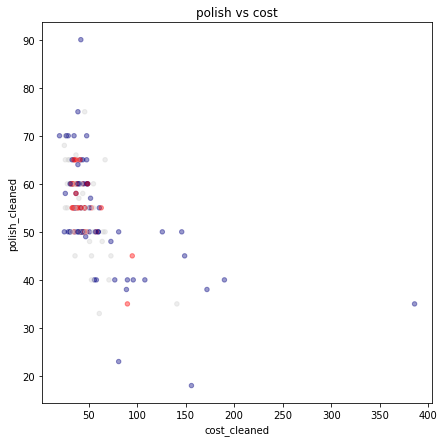

In [110]:
def build_colors(row):
    if row['yamada_nishiki'] == 1:
        return 'navy'
    elif row['gohyaku_mangoku'] == 1:
        return 'red'
    else:
        return 'lightgrey'

colors = df.reset_index().apply(build_colors, axis=1)

ax = df.plot(x='cost_cleaned', y='polish_cleaned', kind='scatter',\
                                            figsize=(7,7), title='polish vs cost', \
                                            color=colors,
                                            alpha=0.4)


# plt.savefig("polish-vs-cost-ricetype.pdf",  bbox_inches='tight')

In [114]:
df[df.polish_cleaned < 30]

,name,sake_type,slug,sake_type_cleaned,prefecture,cost_cleaned,vol,SMV,acidity,alcohol,amino_acid,polish,rice,yeast,nama,nigori,genshu,SMV_cleaned,acidity_cleaned,alcohol_cleaned,amino_acid_cleaned,polish_cleaned,SMV_dry_sweet_bins,SMV_dry_sweet,acidity_richness_bins,acidity_richness,yamada_nishiki,gohyaku_mangoku
47,"Dassai 23 ""Otter Fest""",Junmai Daiginjo - Yamaguchi,shop_all.php?prod_id=11,Junmai Daiginjo,Yamaguchi,80.99,720.0,+3,1.3,15-16%,na,23%,Yamada Nishiki,na,0,0,0,3.0,1.3,15.5,NaN,23.0,"(1.4, 3.4]",4slightly_dry,"(1.2, 1.4]",1light,1,0
60,Tatenokawa 18,Junmai Daiginjo - Yamagata,shop_all.php?prod_id=265,Junmai Daiginjo,Yamagata,155.99,720.0,na,1.5,16-17%,1,18%,Yamada Nishiki,Yamagata Prefecture Proprietary,0,0,0,NaN,1.5,16.5,1.0,18.0,NaN,NaN,"(1.4, 1.6]",2neutral,1,0


In [154]:
cheapest_pricedif['markup'] = \
        (cheapest_pricedif.cost_cleaned - cheapest_pricedif.price_in_japan)/ \
        cheapest_pricedif.price_in_japan * 100
cheapest_pricedif.sort_values('cost_cleaned', ascending=False)

cheapest_pricedif[['name', 'markup', 'cost_cleaned', 'price_in_japan']]

,name,markup,cost_cleaned,price_in_japan
0,Jitsuraku,95.405670,19.99,10.2300
1,Tateyama Tokubetsu Honjozo,11.695590,25.99,23.2686
2,Kinpou Shizenshu,114.971050,25.99,12.0900
3,"Suigei ""Drunken Whale""",146.439476,25.99,10.5462
4,Yoshinosugi Taruzake,184.524563,26.99,9.4860


In [155]:
most_expensive_pricedif[['name', 'markup', 'cost_cleaned', 'price_in_japan']]

,name,markup,cost_cleaned,price_in_japan
0,Tatenokawa 18,55.306651,155.99,100.4400
1,"Kotsuzumi Rojo Hana Ari ""Bloom on the Path""",190.700916,145.99,50.2200
2,"Otokoyama ""Man's Mountain""",253.132488,171.99,48.7041
3,Kyokusen,293.774716,189.99,48.2484
4,"Tatsuriki ""Akitsu""",156.199389,385.99,150.6600
